In [1]:
import pandas as pd 
df = pd.read_csv("salaries.csv")
df.head()

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


In [2]:
inputs = df.drop('salary_more_then_100k',axis=1)

In [3]:
target = df['salary_more_then_100k']

In [4]:
from sklearn.preprocessing import LabelEncoder
le_company=LabelEncoder()
le_job=LabelEncoder()
le_degree=LabelEncoder()

In [5]:
inputs['company'] = le_company.fit_transform(inputs['company'])
inputs['job'] = le_company.fit_transform(inputs['job'])
inputs['degree'] = le_degree.fit_transform(inputs['degree'])

In [6]:
inputs

,company,job,degree
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


In [7]:
target

0     0
1     0
2     1
3     1
4     0
5     1
6     0
7     0
8     0
9     1
10    1
11    1
12    1
13    1
14    1
15    1
Name: salary_more_then_100k, dtype: int64

In [10]:
from sklearn import tree

In [11]:
model = tree.DecisionTreeClassifier()

In [13]:
model.fit(inputs,target)

DecisionTreeClassifier()

In [14]:
model.score(inputs,target)

1.0

In [16]:
model.predict([[2,1,0]])

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [17]:
model.predict([[2,1,1]])

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [23]:
f1 = inputs.columns

In [24]:
f1

Index(['company', 'job', 'degree'], dtype='object')

In [25]:
import matplotlib.pyplot as plt

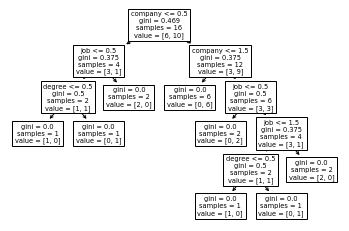

In [26]:
tree.plot_tree(model,feature_names=f1)
plt.show()

In [88]:
df1 = pd.read_csv("titanic.csv")
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [89]:
df1 = df1.drop(columns=['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis=1)

In [90]:
df1.head(10)

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500
5,0,3,male,NaN,8.4583
6,0,1,male,54.0,51.8625
7,0,3,male,2.0,21.0750
8,1,3,female,27.0,11.1333
9,1,2,female,14.0,30.0708


In [91]:
gender_mapping= {'male':0,'female':1}
df1['Sex'] = df1['Sex'].map(gender_mapping)

In [92]:
df1.isnull()

,Survived,Pclass,Sex,Age,Fare
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
886,False,False,False,False,False
887,False,False,False,False,False
888,False,False,False,True,False
889,False,False,False,False,False


In [98]:
df1.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
dtype: int64

In [87]:
df1.dropna(axis=0)

,Survived,Pclass,Sex,Age,Fare
0,0,3,0,22.0,7.2500
1,1,1,1,38.0,71.2833
2,1,3,1,26.0,7.9250
3,1,1,1,35.0,53.1000
4,0,3,0,35.0,8.0500
...,...,...,...,...,...
885,0,3,1,39.0,29.1250
886,0,2,0,27.0,13.0000
887,1,1,1,19.0,30.0000
889,1,1,0,26.0,30.0000


In [94]:
df1 = df1.fillna(df1['Age'].mean())

In [99]:
data = df1.drop('Survived',axis=1)

In [100]:
target = df1['Survived']

In [101]:
from sklearn.model_selection import train_test_split

In [102]:
x_train,x_test,y_train,y_test=train_test_split(data,target,random_state=42)

In [103]:
x_train.shape

(668, 4)

In [104]:
x_test.shape

(223, 4)

In [105]:
from sklearn.tree import DecisionTreeClassifier

In [106]:
tree1 = DecisionTreeClassifier()

In [107]:
tree1.fit(x_train,y_train)

DecisionTreeClassifier()

In [108]:
y_pred = tree1.predict(x_test)

In [110]:
from sklearn.metrics import accuracy_score

In [111]:
accuracy_score(y_test,y_pred)

0.7399103139013453

In [113]:
tree1.score(x_test,y_test)

0.7399103139013453

In [114]:
f1 = data.columns

In [115]:
f1

Index(['Pclass', 'Sex', 'Age', 'Fare'], dtype='object')

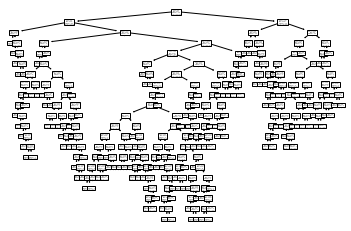

In [116]:
tree.plot_tree(tree1,feature_names=f1)
plt.show()